<a href="https://colab.research.google.com/github/liyzcj/ann/blob/master/project/denoising_autoencoder_fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising Autoencoder Feed Forward Neural Network

## The Fashion MNIST dataset

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
train_imgs = fashion_mnist.train.images
train_labels = fashion_mnist.train.labels
test_imgs = fashion_mnist.test.images
test_labels = fashion_mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### See some inputs

In [0]:
from typing import List
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])
    plt.show()

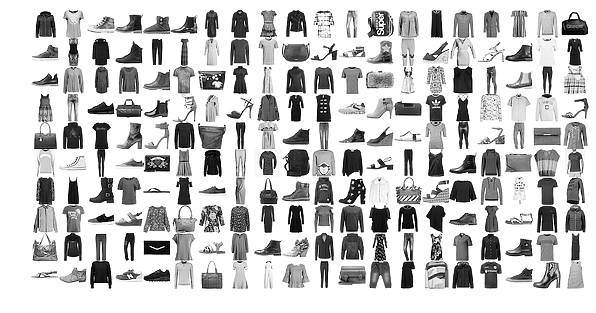

In [0]:
show_mnist(train_imgs[:200])

## Denoising Autoencoder

### Construct Model

In [0]:
hidden_units = 32
input_size = 784
noise_factor = 0.5
epochs = 30
batch_size = 128

In [0]:
# Input
inputs_ = tf.placeholder(tf.float32, [None, input_size], name='inputs_')
targets_ = tf.placeholder(tf.float32, [None, input_size], name='targets_')

# hidden
hidden_layer = tf.layers.dense(inputs_, hidden_units, activation=tf.nn.relu)

# logits和outputs
logits_ = tf.layers.dense(hidden_layer, input_size, activation=None)

outputs_ = tf.sigmoid(logits_, name='outputs_')

# loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits_)
cost = tf.reduce_mean(loss)

# optimizer
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

### Train AutoEncoder

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(len(train_imgs) // batch_size):
        idxs = np.random.choice(len(train_imgs), batch_size)
        imgs = train_imgs[idxs].reshape(-1,784)
        
        # Add Noise
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)

        batch_cost, _ = sess.run([cost, optimizer], 
                                 feed_dict={inputs_: noisy_imgs, 
                                            targets_: imgs})

    print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/30... Training loss: 0.3438
Epoch: 2/30... Training loss: 0.3226
Epoch: 3/30... Training loss: 0.3152
Epoch: 4/30... Training loss: 0.3040
Epoch: 5/30... Training loss: 0.3059
Epoch: 6/30... Training loss: 0.3007
Epoch: 7/30... Training loss: 0.3107
Epoch: 8/30... Training loss: 0.3098
Epoch: 9/30... Training loss: 0.3120
Epoch: 10/30... Training loss: 0.3024
Epoch: 11/30... Training loss: 0.3309
Epoch: 12/30... Training loss: 0.3108
Epoch: 13/30... Training loss: 0.3074
Epoch: 14/30... Training loss: 0.2963
Epoch: 15/30... Training loss: 0.2962
Epoch: 16/30... Training loss: 0.3039
Epoch: 17/30... Training loss: 0.3126
Epoch: 18/30... Training loss: 0.3050
Epoch: 19/30... Training loss: 0.3084
Epoch: 20/30... Training loss: 0.2992
Epoch: 21/30... Training loss: 0.3038
Epoch: 22/30... Training loss: 0.2925
Epoch: 23/30... Training loss: 0.2833
Epoch: 24/30... Training loss: 0.3031
Epoch: 25/30... Training loss: 0.3136
Epoch: 26/30... Training loss: 0.3083
Epoch: 27/30... Train

### Test:

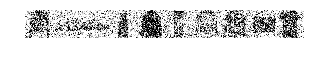

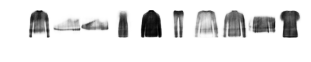

In [0]:
imgs = test_imgs[10:20].reshape(-1,784)
# Add Noise
noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0.0, 1.0)

reconstructed = sess.run(outputs_, feed_dict={inputs_: noisy_imgs})

show_mnist(noisy_imgs)
show_mnist(reconstructed)

## Feed forward-networks

### Layers

Each layer will have three methods:
 - `forward` computes and returns ${\bf y}^{(l)} = f_l\left({\bf x}^{(l)}, {\bf w}^{(l)}\right)$
 - `backward` gets $\frac{\partial {\cal L}}{\partial {\bf y}^{(l)}}$, and stores $\frac{\partial {\cal L}}{\partial {\bf w}^{(l)}}$ internally, and returns $\frac{\partial {\cal L}}{\partial {\bf w}^{(l)}}$
 - `update` modifies parameters ${\bf w}^{(l)}$ using stored $\frac{\partial{\cal L}}{\partial{\bf w}}$

In [0]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing

### The feed-forward netowork

In [0]:
class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy:np.ndarray) -> np.ndarray:
        # TODO <0> : Compute the backward phase
        """
        LI YANZHE
        """
        for layer in self.layers[::-1]:
            dy = layer.backward(self._inputs.pop(), dy)
            
        # return dy
        #raise NotImplementedError
        del self._inputs
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

### The linear layer

In [0]:
class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
        # for nesterov
        self.vw = np.zeros_like(self.dweight)
        self.vb = np.zeros_like(self.bias)
        # for adam
        self.mw = np.zeros_like(self.dweight)
        self.mb = np.zeros_like(self.bias)
        self.iter = 1
#         # for nestrov
#         self.v = np.zeros_like(self.dweight)
#         self.vw = np.zeros_likei(self.bias)
#         self.last_dweight = np.zeros_like(self.dweight)
#         self.last_bias = np.zeros_like(self.bias)
#         self.flag = 0
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <1> : compute the output of a linear layer
        """
        LI YANZHE
        """
        out = np.dot(x, self.weight) + self.bias
        # self.a = output
        return out
        raise NotImplementedError
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <2> : compute dweight, dbias and  return dx
        """
        LI YANZHE
        """
        self.dweight = np.dot(np.transpose(x), dy)
        self.dbias = np.sum(dy, axis=0)
        
        dx = np.dot(dy, np.transpose(self.weight))
        return dx
        raise NotImplementedError
    
    def update(self, mode='SGD', lr=0.001, mu=.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        elif mode == 'Nesterov':
            # TODO <9> : compute the nesterov update (for Lab 2)
            """
            LI YANZHE
            """
            v_pre_w = self.vw.copy()
            v_pre_b = self.vb.copy()
            
            self.vw = mu * self.vw - lr * self.dweight
            self.vb = mu * self.vb - lr * self.dbias
            
            self.weight += - mu * v_pre_w + (1 + mu) * self.vw
            self.bias += - mu * v_pre_b + (1 + mu) * self.vb
            
#             if self.flag == 0:
#                 self.last_dweight = self.dweight.copy()
#                 self.last_bias = self.bias.copy()
#                 self.vw = np.zeros_like(self.dweight)
#                 self.vb = np.zeros_like(self.bias)
#                 self.flag = 1
                
#             # update v
#             self.vw = mu * self.vw + self.dweight + mu * (self.dweight - self.last_dweight)
#             self.vb = mu * self.vb + self.dbias + mu * (self.bias - self.last_bias)
#             # save this weight and bias as last weight and bias
#             self.last_bias = self.bias.copy()
#             self.last_dweight = self.dweight.copy()
#             # update weight and bias
#             self.weight = self.weight - lr * self.vw
#             self.bias = self.bias - lr * self.vb
            
            
            # raise NotImplementedError
        elif mode == 'Adam':
            eps = np.finfo(float).eps
            # TODO <10> : compute the Adam update  (for Lab 2)
            self.mw = mu * self.mw + (1 - mu) * self.dweight
            mt = self.mw / (1 - mu ** self.iter)
            self.vw = mu * self.vw + (1 - mu) * (self.dweight ** 2)
            vt = self.vw / (1 - mu ** self.iter)
            self.weight += - lr * mt / (np.sqrt(vt) + eps)
            
            self.mb = mu * self.mb + (1 - mu) * self.dbias
            mt = self.mb / (1 - mu ** self.iter)
            self.vb = mu * self.vb + (1 - mu) * (self.dbias ** 2)
            vt = self.vb / (1 - mu ** self.iter)
            self.bias += - lr * mt / (np.sqrt(vt) + eps)
            
            self.iter += 1
            # raise NotImplementedError

### The Rectified Linear Unit
$$y = \max\left(x, 0\right)$$

In [0]:
class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <3> : Compute the output of a rectified linear unit
        """
        LI YANZHE
        """
        x = x * (x > 0)
        return x
        raise NotImplementedError
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <4> : Compute the gradient w.r.t. x
        """
        LI YANZHE
        """
        dx = dy * (x > 0)
        return dx
        raise NotImplementedError

### The loss function

   The negative log likelihood combines a softmax activation, and a cross-entropy cost.

In [0]:
class NegativeLogLikelihood:
    
    def __init__(self):
        pass

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # TODO <5> : Compute the negative log likelihood
        """
        LI YANZHE
        """
        # process t
        m = t.shape[0]
        T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
        t = t.reshape(-1,1)
        T = T == t
        # softmax 
        s = np.exp(y) / np.sum(np.exp(y), axis=1).reshape(-1,1)
        loss = - np.sum(T * np.log(s))/m
        return loss
        raise NotImplementedError
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # TODO <6> : Compute dl/dy
        """
        LI YANZHE
        """
        m = t.shape[0]
        T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
        t = t.reshape(-1,1)
        T = T == t
        # softmax 
        s = np.exp(y) / np.sum(np.exp(y), axis=1).reshape(-1,1)
        dy = (s - T) /m
        return dy
        raise NotImplementedError

### Accuracy

In [0]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # TODO <7> : Compute accuracy
    """
    LI YANZHE
    """
    # process t
    m = t.shape[0]
    # T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
    # t = t.reshape(-1,1)
    # T = T == t
    # process y
    y = np.argmax(y, axis = 1)
    # compute accuracy
    # a = np.sum(y * T) / m
    a = np.sum(y == t) / m
    return a
    raise NotImplementedError

### Training

#### Initial neural network

In [0]:
BATCH_SIZE = 128
HIDDEN_UNITS = 200
EPOCHS_NO = 10

optimize_args = {'mode': 'Adam', 'lr': .001}

net = FeedForwardNetwork([Linear(784, HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 10)])
nll = NegativeLogLikelihood()

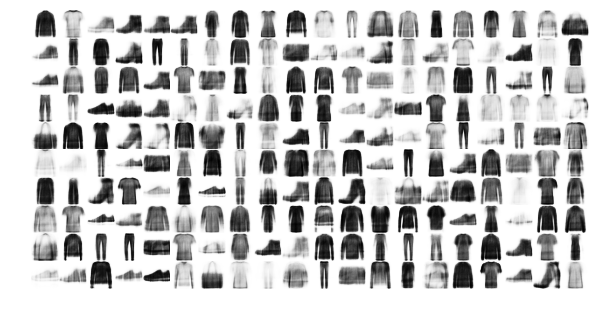

0.9956203


In [0]:
# Add Noise
train_imgs = train_imgs + noise_factor * np.random.randn(*train_imgs.shape)
train_imgs = np.clip(train_imgs, 0., 1.)
# reconstruction
train_imgs = sess.run(outputs_, feed_dict={inputs_: train_imgs})
show_mnist(train_imgs[:200])
print(np.max(train_imgs))
train_imgs = train_imgs * 255
test_imgs = test_imgs * 255
mean, std  = train_imgs.mean(), train_imgs.std()
train_imgs = (train_imgs - mean) / std
test_imgs = (test_imgs - mean) / std

In [0]:
train_imgs = train_imgs.reshape(-1,28,28)
test_imgs = test_imgs.reshape(-1,28,28)

#### Train 

In [0]:
for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(train_imgs), BATCH_SIZE)):
        # 1. Prepare next batch
        x = train_imgs[idx:idx + BATCH_SIZE,:,:].reshape(-1, 784)
        t = train_labels[idx:idx + BATCH_SIZE]
        
        # TODO <8> : Compute gradient
        """
        LI YANZHE
        """
        # 2. Compute gradient
        # process forward propagation
        y = net.forward(x)
        loss = nll.forward(y, t)
        # compute dy
        dy = nll.backward(y, t)
        # process backward propagation
        net.backward(dy)
        
        # raise NotImplementedError
        # 3. Update network parameters
        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:3.5f} '
              f'| Train Accuracy: {accuracy(y, t):3.2f} ', end='')

    y = net.forward(test_imgs.reshape(-1, 784), train=False)
    test_nll = nll.forward(y, test_labels)
    print(f' | Test NLL: {test_nll:3.5f} '
          f' | Test Accuracy: {accuracy(y, test_labels):3.2f}')

Epoch 01 | Batch 429 | Train NLL: 0.57039 | Train Accuracy: 0.76  | Test NLL: 0.52511  | Test Accuracy: 0.81
Epoch 02 | Batch 429 | Train NLL: 0.50895 | Train Accuracy: 0.83  | Test NLL: 0.48224  | Test Accuracy: 0.82
Epoch 03 | Batch 429 | Train NLL: 0.49636 | Train Accuracy: 0.84  | Test NLL: 0.45903  | Test Accuracy: 0.83
Epoch 04 | Batch 429 | Train NLL: 0.50202 | Train Accuracy: 0.84  | Test NLL: 0.45503  | Test Accuracy: 0.83
Epoch 05 | Batch 429 | Train NLL: 0.49802 | Train Accuracy: 0.82  | Test NLL: 0.44974  | Test Accuracy: 0.83
Epoch 06 | Batch 429 | Train NLL: 0.50716 | Train Accuracy: 0.85  | Test NLL: 0.44599  | Test Accuracy: 0.83
Epoch 07 | Batch 429 | Train NLL: 0.49755 | Train Accuracy: 0.84  | Test NLL: 0.44972  | Test Accuracy: 0.83
Epoch 08 | Batch 429 | Train NLL: 0.48251 | Train Accuracy: 0.85  | Test NLL: 0.44739  | Test Accuracy: 0.84
Epoch 09 | Batch 429 | Train NLL: 0.50972 | Train Accuracy: 0.83  | Test NLL: 0.44938  | Test Accuracy: 0.84
Epoch 10 | Batch 42

## Prediction

Pradict Labels: [2 3 8 8 0 3 7 8 7 6 3 3 8 9 5]
Correct Labels: [2 3 8 8 0 3 7 8 7 6 3 3 6 9 5]


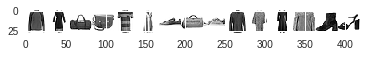

In [0]:
# random get number
idxs = np.random.randint(0, len(test_imgs), 15)
imgs = np.concatenate(tuple(test_imgs[idx,:,:] for idx in idxs), axis=1)
x = np.array([test_imgs[idx,:,:] for idx in idxs]).reshape(-1,784)
#pradicate number
y = net.forward(x)
y = np.argmax(y,axis=1)
plt.imshow(imgs)
print("Pradict Labels:",y)
print("Correct Labels:",test_labels[idxs])

## Prediction with Noise

### Choose Data

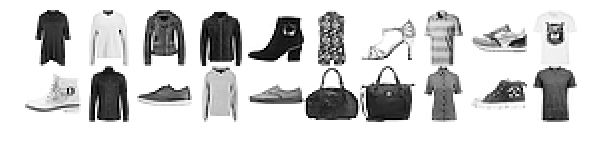

In [0]:
idxs = np.random.randint(0, len(test_imgs), 20)
data = test_imgs[idxs]
data = data.reshape(-1,784)
show_mnist(data)

### Add Noise

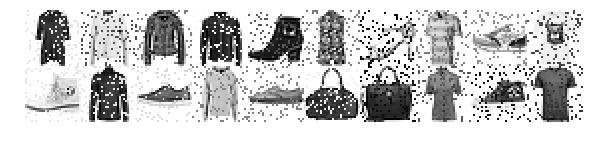

In [0]:
level = 100

for img in data:
  noisepix = np.random.choice(784, level, replace=False)
  img[noisepix] = (np.random.randint(255) - mean) / std
  
show_mnist(data)

### Predict

[3 2 4 4 9 6 5 0 8 0 9 6 7 6 7 8 8 0 7 0]


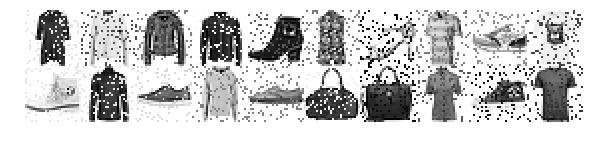

In [0]:
y = net.forward(data)
y = np.argmax(y,axis=1)
print(y)
show_mnist(data)

### For all Test Data -- Only Feed Farward

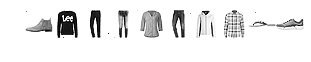

level: 0%, Accuracy : 0.8371


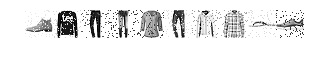

level: 10%, Accuracy : 0.8256


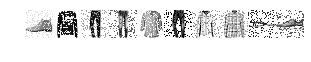

level: 20%, Accuracy : 0.8011


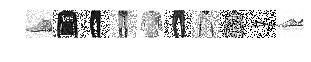

level: 30%, Accuracy : 0.7588


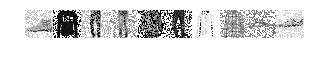

level: 40%, Accuracy : 0.6966


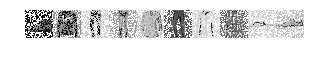

level: 50%, Accuracy : 0.5937


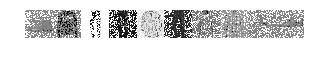

level: 60%, Accuracy : 0.5026


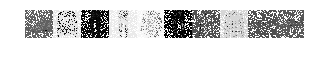

level: 70%, Accuracy : 0.3897


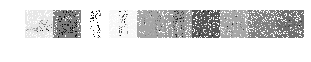

level: 80%, Accuracy : 0.2839


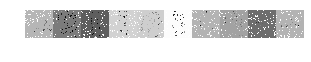

level: 90%, Accuracy : 0.1795


In [0]:
accuracies1 = []
for level in range(100):
  data = test_imgs.reshape(-1,784).copy()
  noise = np.max([1, 784 * level // 100])
  for img in data:
    noisepix = np.random.choice(784, noise, replace=False)
    img[noisepix] = (np.random.randint(255) - mean) / std
  y = net.forward(data)
  acc = accuracy(y, test_labels)
  accuracies1.append(acc)
  if level % 10 == 0:
    show_mnist(data[:10])
    print(f'level: {level}%, Accuracy : {acc}')

Text(0,0.5,'Accuracy')

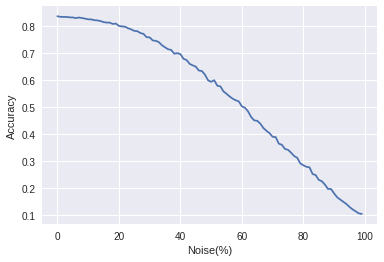

In [0]:
plt.plot(accuracies1)
plt.xlabel('Noise(%)')
plt.ylabel('Accuracy')

### For all Test Data -- Denoising Autoencoder + Feed Farward

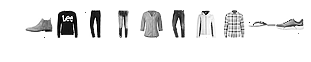

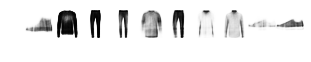

level: 0%, Accuracy : 0.8215


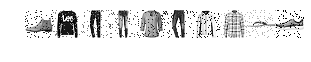

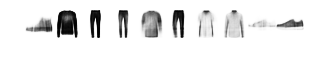

level: 10%, Accuracy : 0.8212


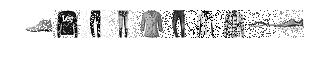

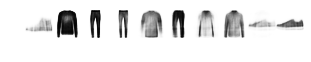

level: 20%, Accuracy : 0.8103


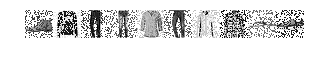

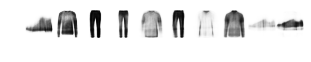

level: 30%, Accuracy : 0.7916


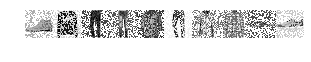

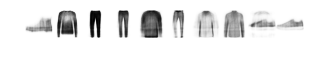

level: 40%, Accuracy : 0.7432


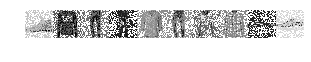

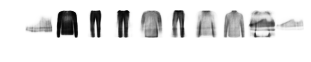

level: 50%, Accuracy : 0.6686


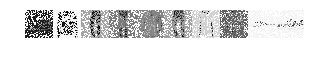

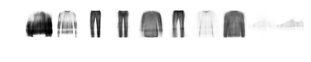

level: 60%, Accuracy : 0.5576


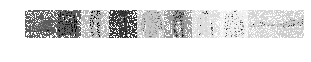

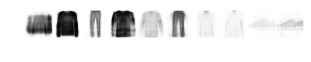

level: 70%, Accuracy : 0.4288


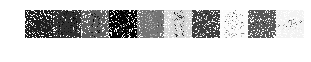

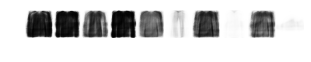

level: 80%, Accuracy : 0.2797


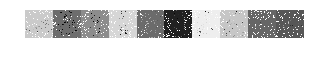

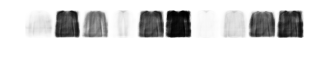

level: 90%, Accuracy : 0.1648


In [0]:
origin = []
recons = []
accuracies2 = []
for level in range(100):
  data = test_imgs.reshape(-1,784).copy()
  noise = np.max([1, 784 * level // 100])
  for img in data:
    noisepix = np.random.choice(784, noise, replace=False)
    img[noisepix] = (np.random.randint(255) - mean) / std
  data = (data * std + mean) / 255
  reconstructed = sess.run(outputs_, feed_dict={inputs_: data})
  reconstructed = (reconstructed * 255 - mean) / std
  y = net.forward(reconstructed)
  acc = accuracy(y, test_labels)
  accuracies2.append(acc)
  if level % 10 == 0:
    show_mnist(data[:10])
    origin.append(data[:10])
    show_mnist(reconstructed[:10])
    recons.append(reconstructed[:10])
    print(f'level: {level}%, Accuracy : {acc}')

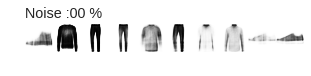

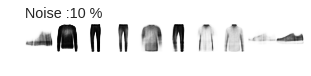

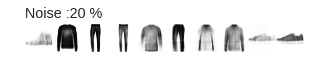

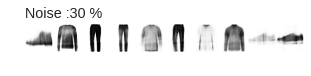

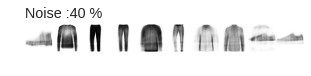

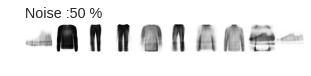

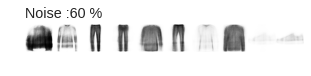

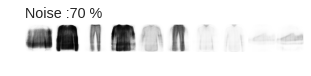

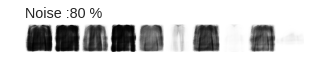

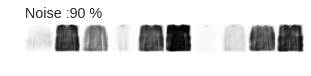

In [0]:
for i,imgs in enumerate(recons):
  title = "Noise :" + str(i) + '0 %'
  show_mnist(imgs, title=title, loc='left', fontsize='x-large')

Text(0,0.5,'Accuracy')

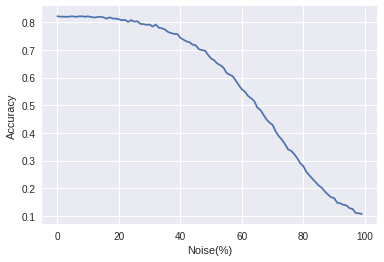

In [0]:
plt.plot(accuracies2)
plt.xlabel('Noise(%)')
plt.ylabel('Accuracy')

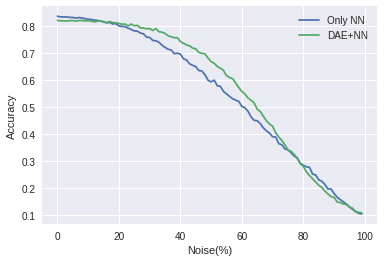

In [0]:
plt.plot(accuracies1,label='Only NN')
plt.plot(accuracies2,label='DAE+NN')
plt.xlabel('Noise(%)')
plt.ylabel('Accuracy')
plt.legend()